In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('TaxiDataCleaned.csv')
df

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
0,8,12.45,5,19,6,1970-01-01 00:00:01.400269500,41.896097,-87.628442,41.896514,-87.629493,2.759865,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,555.020641,8,0.0
1,8,0.00,3,19,5,1970-01-01 00:00:01.362683700,41.896097,-87.628442,41.896514,-87.629493,2.759865,Unknown,Chicago Elite Cab Corp.,300.000000,8,0.0
2,60,27.05,10,2,3,1970-01-01 00:00:01.380593700,41.836150,-87.648788,41.896514,-87.629493,12.600000,Cash,Taxi Affiliation Services,1380.000000,8,0.0
3,10,5.85,10,1,2,1970-01-01 00:00:01.382319000,41.985015,-87.804532,41.896514,-87.629493,2.759865,Cash,Taxi Affiliation Services,180.000000,8,0.0
4,14,16.65,5,7,5,1970-01-01 00:00:01.369897200,41.968069,-87.721559,41.896514,-87.629493,2.759865,Cash,Dispatch Taxi Affiliation,1080.000000,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14099,8,3.25,5,11,5,1970-01-01 00:00:01.431602100,41.904935,-87.649907,41.904935,-87.649907,2.759865,Cash,Taxi Affiliation Services,60.000000,8,0.0
14100,8,3.25,11,16,4,1970-01-01 00:00:01.385568900,41.904935,-87.649907,41.904935,-87.649907,2.759865,Cash,Taxi Affiliation Services,555.020641,8,0.0
14101,8,4.25,12,13,3,1970-01-01 00:00:01.449579600,41.904935,-87.649907,41.904935,-87.649907,0.300000,Cash,Taxi Affiliation Services,180.000000,8,0.0
14102,61,9.85,9,15,6,1970-01-01 00:00:01.410534000,41.809018,-87.659167,41.829922,-87.672503,3.000000,Cash,Taxi Affiliation Services,780.000000,59,0.0


# (a) Outlier Analysis

### Box Plots

c:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


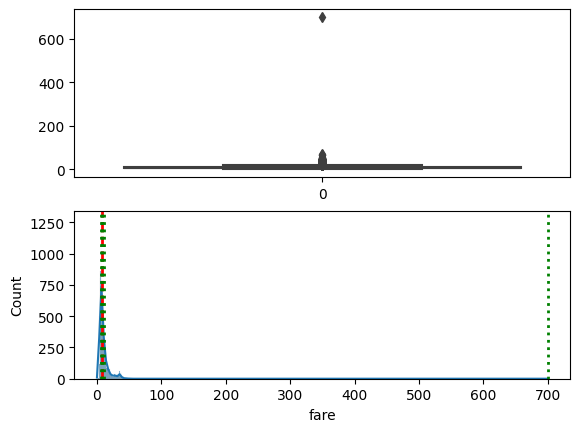

In [23]:
fare = df['fare']
quartiles = fare.quantile([0.25, 0.5, 0.75, 1]).values
fig, axs = plt.subplots(nrows=2)
plot1 = sns.boxplot(fare, ax=axs[0])
plot2 = sns.histplot(fare, ax=axs[1], kde=True)
axs[1].axvline(np.median(fare), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

The top point of fare can be considered outlier. Thus this needs to be dropped.

c:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


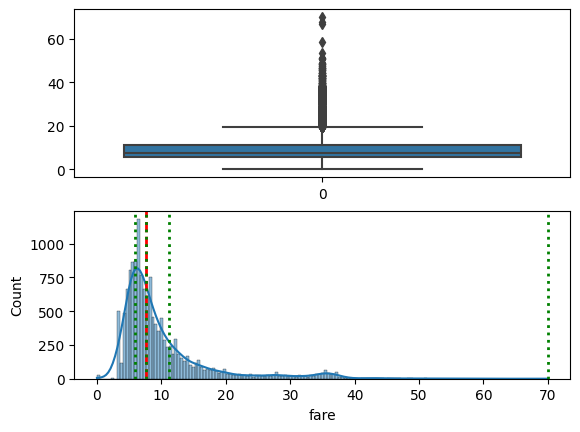

In [24]:
fare = df['fare']
fare.drop(fare[fare == fare.max()].index, inplace=True)
# fare.drop(fare[fare == fare.max()].index, inplace=True)
quartiles = fare.quantile([0.25, 0.5, 0.75, 1]).values
fig, axs = plt.subplots(nrows=2)
plot1 = sns.boxplot(fare, ax=axs[0])
plot2 = sns.histplot(fare, ax=axs[1], kde=True)
axs[1].axvline(np.median(fare), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

After dropping that one point, there doesn't seem to be any more outliers.

c:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


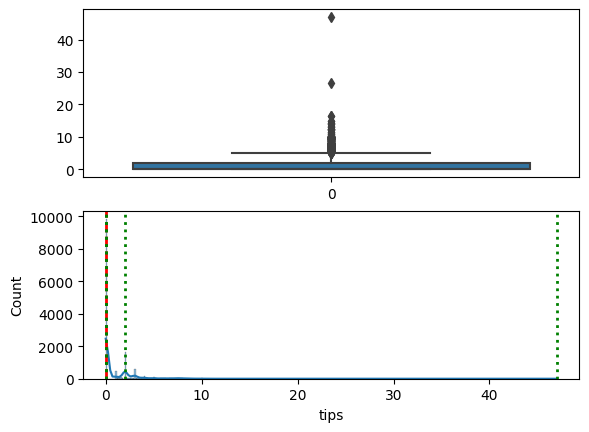

In [25]:
tips = df['tips']
quartiles = tips.quantile([0.25, 0.5, 0.75, 1]).values
fig, axs = plt.subplots(nrows=2)
plot1 = sns.boxplot(tips, ax=axs[0])
plot2 = sns.histplot(tips, ax=axs[1], kde=True)
axs[1].axvline(np.median(tips), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

The top two points for the tips look like a outliers. So they are dropped.

c:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


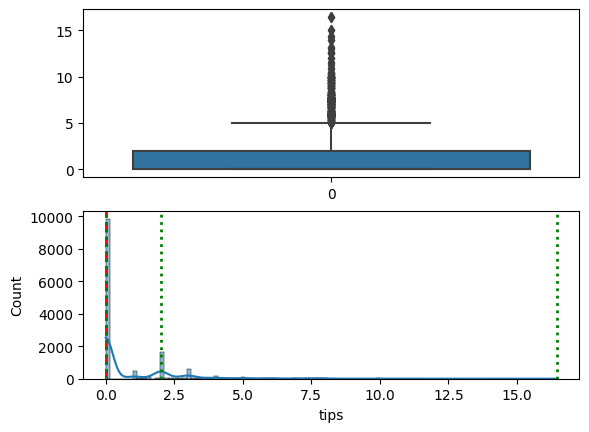

In [26]:
tips = df['tips']
tips.drop(tips[tips == tips.max()].index, inplace=True)
tips.drop(tips[tips == tips.max()].index, inplace=True)
quartiles = tips.quantile([0.25, 0.5, 0.75, 1]).values
fig, axs = plt.subplots(nrows=2)
plot1 = sns.boxplot(tips, ax=axs[0])
plot2 = sns.histplot(tips, ax=axs[1], kde=True)
axs[1].axvline(np.median(tips), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

So, the rows corresponding to the maximum points need to be dropped

Text(0, 0.5, 'Tips')

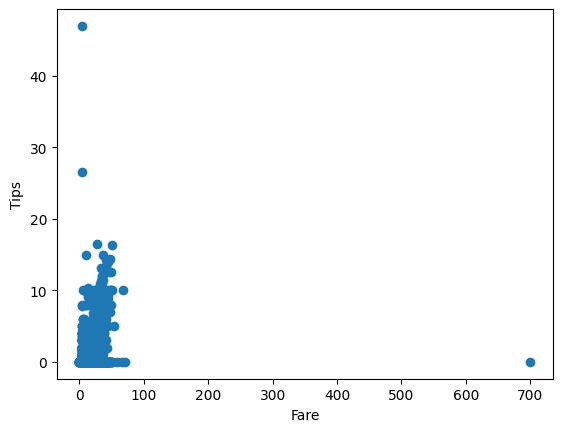

In [27]:
# Scatter plot of tips v/s fare
plt.scatter(df['fare'], df['tips'])
plt.xlabel('Fare')
plt.ylabel('Tips')

The scatter plot of fare and tips also shows that the maximum values are outliers and are not in the consistent patterns. It feels like the rows containing the maximum value of fare and maximum 2 values of tips respectively should be dropped.<br><br>
There are ways of handling outliers.
<ul>
<li><b>Drop them.</b> Remove the rows corresponding to the outliers.</li><br>
<li><b>Cap or transform outliers.</b> Replacing the outliers with a specific threshold (95th or 99th percentile). This can reduce the impact of the outliers while retaining the data structure.</li><br>
<li><b>Create separate analyses.</b> Analyse the data with and without outliers. This approach helps understand how outliers impact the results and can help explain any deviations when reporting findings.</li>
</ul>

Here, I'm dropping the rows corresponding to the outliers

### Dropping Outliers

Text(0, 0.5, 'Tips')

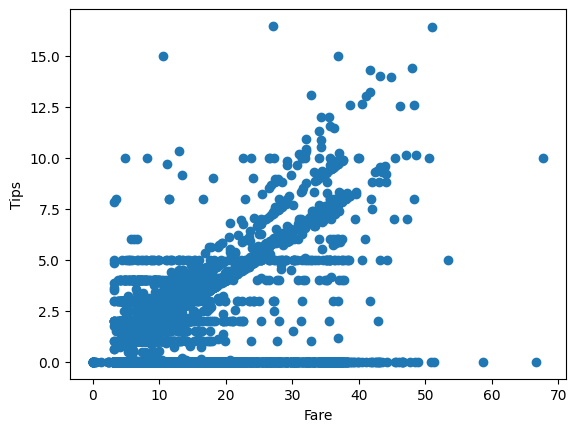

In [28]:
##################### Dropping the outliers ######################
df_analysed = df.loc[df['fare'] != df['fare'].max()]
df_analysed = df_analysed.loc[df_analysed['fare'] != df_analysed['fare'].max()]
df_analysed = df_analysed.loc[df_analysed['tips'] != df_analysed['tips'].max()]
df_analysed = df_analysed.loc[df_analysed['tips'] != df_analysed['tips'].max()]
##################################################################
# Scatter plot of tips v/s fare
plt.scatter(df_analysed['fare'], df_analysed['tips'])
plt.xlabel('Fare')
plt.ylabel('Tips')

The outliers were unusually high compared to others and thus it will pull the mean upward, making it seem as though the entire dataset is higher than it truly is. Thus, it masked the true trend. The true trend obtained after dropping the outliers shows that fare and tips do have some correlation. 

# (b) Predicting fare

We will be using trip miles, trip seconds, pickup community area and dropoff community area for predicting the values of fare

Text(0, 0.5, 'Fare')

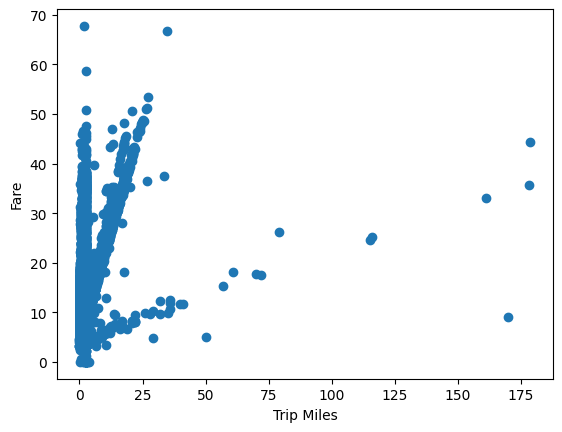

In [29]:
plt.scatter(df_analysed['trip_miles'], df_analysed['fare'])
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

Fare is linearly dependent on trip miles but after knowing some other variable values (categorical variables).

Text(0, 0.5, 'Fare')

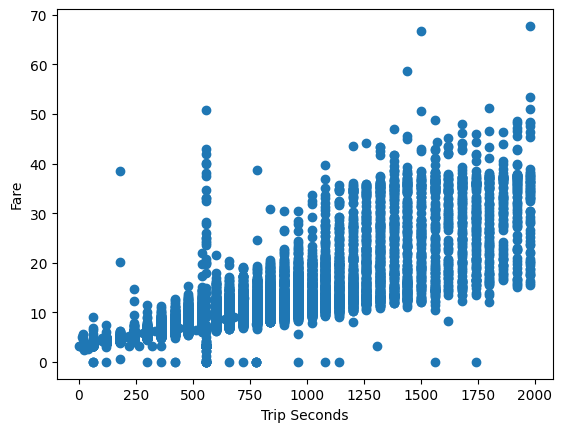

In [30]:
plt.scatter(df_analysed['trip_seconds'], df_analysed['fare'])
plt.xlabel('Trip Seconds')
plt.ylabel('Fare')

Fare is a correlated with trip seconds

Text(0, 0.5, 'Fare')

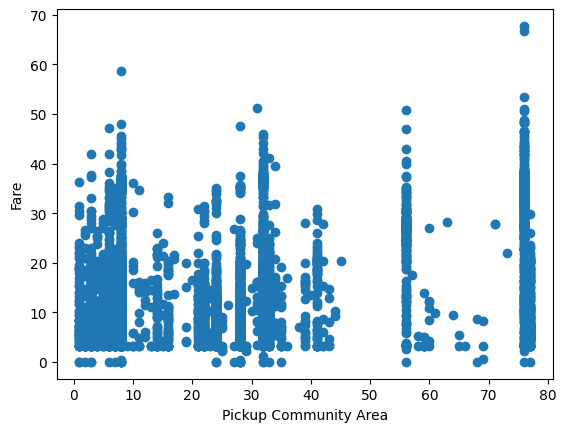

In [31]:
plt.scatter(df_analysed['pickup_community_area'], df_analysed['fare'])
plt.xlabel('Pickup Community Area')
plt.ylabel('Fare')

Pickup community area is a categorical variable. So fare cannot be linearly dependent on this (i.e. in order to accomdate this features, we will have to use one hot encoding and since the number of unique commuity areas are very large, using one-hot encoding will complicate the model unnecesarily). Moreover, some part of the information conveyed by this feature is acccomodated in other features like Trip Distance.

Text(0, 0.5, 'Fare')

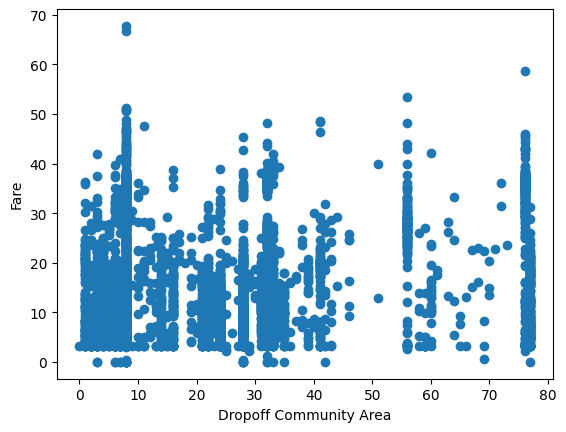

In [32]:
plt.scatter(df_analysed['dropoff_community_area'], df_analysed['fare'])
plt.xlabel('Dropoff Community Area')
plt.ylabel('Fare')

Dropoff community area is also a categorical feature, thus, fare is not lineraly dependent on it.

The plots show that the fare is dependent on the trip miles and trip seconds linearly. Therefore, applying linear regression

## Linear Regression

In [33]:
X = df_analysed[['trip_miles', 'trip_seconds', 'dropoff_community_area', 'pickup_community_area']]
Y = df_analysed['fare']
display(X)
display(Y)

,trip_miles,trip_seconds,dropoff_community_area,pickup_community_area
0,2.759865,555.020641,8,8
1,2.759865,300.000000,8,8
2,12.600000,1380.000000,8,60
3,2.759865,180.000000,8,10
4,2.759865,1080.000000,8,14
...,...,...,...,...
14099,2.759865,60.000000,8,8
14100,2.759865,555.020641,8,8
14101,0.300000,180.000000,8,8
14102,3.000000,780.000000,59,61


0        12.45
1         0.00
2        27.05
3         5.85
4        16.65
         ...  
14099     3.25
14100     3.25
14101     4.25
14102     9.85
14103     7.45
Name: fare, Length: 14100, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

In [35]:
def fit(X, Y):
    '''returns the weights for the polynomial regression'''
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

def predict(X, B):
    '''returns the predicted values for the polynomial regression'''
    return X.dot(B)

def rmse(Y, Y_pred):
	'''returns the root mean squared error'''
	return np.sqrt(np.mean((Y - Y_pred)**2))

def mae(Y, Y_pred):
    '''returns the mean absolute error'''
    return np.mean(np.abs(Y - Y_pred))

def rsquared(Y, Y_pred):
    '''returns the r-squared value'''
    return 1 - np.sum((Y - Y_pred)**2) / np.sum((Y - np.mean(Y))**2)

In [36]:
B_train = fit(X_train, Y_train)
B_train

array([0.38400976, 0.01192719, 0.02034073, 0.04433442])

In [37]:
Y_pred = predict(X_test, B_train)
display(Y_pred)
display(Y_test)

627       7.758570
7318      8.485735
616      18.671637
5940     23.980726
6698      1.894095
           ...    
13603     9.340151
2470      7.128460
5682      7.945473
11930    11.630737
9812      9.081924
Length: 2820, dtype: float64

627       8.05
7318     11.05
616      18.05
5940     36.05
6698      4.65
         ...  
13603     8.65
2470      6.45
5682      6.85
11930    11.45
9812      6.85
Name: fare, Length: 2820, dtype: float64

In [38]:
RMSE_train_pred = rmse(Y_train, predict(X_train, B_train))
MAE_train_pred = mae(Y_train, predict(X_train, B_train))

RMSE_test_pred = rmse(Y_test, Y_pred)
MAE_test_pred = mae(Y_test, Y_pred)

R2_train_pred = rsquared(Y_train, predict(X_train, B_train))
R2_test_pred = rsquared(Y_test, Y_pred)

print(f'RMSE for training data: {RMSE_train_pred}')
print(f'MAE for training data: {MAE_train_pred}')
print()
print(f'RMSE for test data: {RMSE_test_pred}')
print(f'MAE for test data: {MAE_test_pred}')
print()
print(f'R^2 for training data: {R2_train_pred}')
print(f'R^2 for test data: {R2_test_pred}')

RMSE for training data: 3.588761056527394
MAE for training data: 2.1993976392188817

RMSE for test data: 3.9102186019146035
MAE for test data: 2.17566025712367

R^2 for training data: 0.7604702026103899
R^2 for test data: 0.7218002429692063


## Effectiveness of the model

In [39]:
df_analysed['fare'].describe()

count    14100.000000
mean        10.074989
std          7.349282
min          0.000000
25%          5.850000
50%          7.650000
75%         11.250000
max         67.750000
Name: fare, dtype: float64

### Effectiveness
The minimum value of fare is 0 while maximum is 67.75. The RMSE is 3.61. Therefore, the RMSE suggests that the model's predictions, on average, are off by 3.61 units off from the actual fare. This is acceptable because of the range of the fare being 0 to 67.75.<br>
Thus the model is a good fit

### Limitations
<ul>
<li><b>Categorical features:</b> Both pickup community area and dropoff community area are categorical variables </li><br>
<li><b>Omitted variables:</b> The variable company has not been used in this. The fares can very well depend on the taxi service company</li>
</ul>

### Areas of improvement
<ul>
<li><b>Include more variables:</b> Company can be included while fitting because the fares can depend on the taxi service company. Also, adding time-based variables like day of the week, hour of the day, could also improve accuracy, as fares may fluctuate based on demand patterns of peak hours.</li><br>
<li><b>Alternative model:</b> A Random forest can be used along with linear regression for predicting the fate values because Random forest will take care of the categorical data</li>
</ul>